In [21]:
import pandas as pd
import numpy as np
import json

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.linalg import norm

# local library
from preproc import *

In [22]:
sw = set(stopwords.words('english') + ["[applause]", "[music]"] \
    + ["that's", "they'll", "they're", "we'll", "we're", "i'm", "i'll", "they've",
 "i've", "here's", "it'll", "we've", "let's", "he's", "there's", "i'd", "what's"])

In [23]:
with open('speeches.json') as f:
    speeches = json.load(f)

In [24]:
bow = create_bow(speeches)
bow

,index,speaker,date,speech,title,transcript_type
id,,,,,,
oWlLZZ8pcp8,8,trump,2019-04-28T02:07:41Z,[Music] [Music] [Music] [Music] [Music] [Appla...,Watch Live: President Trump's MAGA Rally in Gr...,speech
Z6N1WdJgnLo,47,biden,2019-04-29T21:04:46Z,[Applause] [Music] my name [Applause] thank yo...,Joe Biden holds first 2020 campaign rally,speech
WIwGrZKdsY0,9,trump,2019-05-09T03:55:17Z,[Music] from the leaves of Minnesota [Music] a...,FULL RALLY: President Trump in Panama City Bea...,speech
u-AEAq7jzcU,48,biden,2019-05-18T19:53:18Z,so let's do this please welcome my husband Joe...,Joe Biden speaks during a campaign rally in Ph...,speech
GgINUxecNrg,10,trump,2019-05-21T00:39:36Z,[Music] from the laser Minnesota [Music] the T...,"FULL RALLY: President Trump in Montoursville, ...",speech
...,...,...,...,...,...,...
4IXd1jJxBmk,167,biden,2020-11-03T06:58:33Z,hello philadelphia [Applause] man it is good t...,"Obama Campaigns for Biden in Philadelphia, PA ...",speech
EOKYNSCsMTI,169,pence,2020-11-03T14:11:37Z,hello philadelphia [Applause] man it is good t...,President Trump and VP Pence make final stop i...,speech
Kl0Cf5VQvfs,170,trump,2020-11-04T15:54:23Z,[Applause] uh thank you very much thank you ve...,Trump’s full speech at the Republican National...,speech


In [25]:
bow

,index,speaker,date,speech,title,transcript_type
id,,,,,,
oWlLZZ8pcp8,8,trump,2019-04-28T02:07:41Z,[Music] [Music] [Music] [Music] [Music] [Appla...,Watch Live: President Trump's MAGA Rally in Gr...,speech
Z6N1WdJgnLo,47,biden,2019-04-29T21:04:46Z,[Applause] [Music] my name [Applause] thank yo...,Joe Biden holds first 2020 campaign rally,speech
WIwGrZKdsY0,9,trump,2019-05-09T03:55:17Z,[Music] from the leaves of Minnesota [Music] a...,FULL RALLY: President Trump in Panama City Bea...,speech
u-AEAq7jzcU,48,biden,2019-05-18T19:53:18Z,so let's do this please welcome my husband Joe...,Joe Biden speaks during a campaign rally in Ph...,speech
GgINUxecNrg,10,trump,2019-05-21T00:39:36Z,[Music] from the laser Minnesota [Music] the T...,"FULL RALLY: President Trump in Montoursville, ...",speech
...,...,...,...,...,...,...
4IXd1jJxBmk,167,biden,2020-11-03T06:58:33Z,hello philadelphia [Applause] man it is good t...,"Obama Campaigns for Biden in Philadelphia, PA ...",speech
EOKYNSCsMTI,169,pence,2020-11-03T14:11:37Z,hello philadelphia [Applause] man it is good t...,President Trump and VP Pence make final stop i...,speech
Kl0Cf5VQvfs,170,trump,2020-11-04T15:54:23Z,[Applause] uh thank you very much thank you ve...,Trump’s full speech at the Republican National...,speech


In [5]:
bow[['speaker','date','title','transcript_type','speech']].to_csv('data/speeches.csv')

In [6]:
import string
import re
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem.snowball import SnowballStemmer

def my_tokenizer(document):
        #tk = WhitespaceTokenizer()
        stemmer = SnowballStemmer("english")
        # Break the sentence into tokens based on whitespace
        for token in document.split():
            # Apply preprocessing to the token
            token = token.lower().strip()
            token = re.sub(r'[_*:!?& ]', '', token).rstrip('.,')

            # If punctuation, ignore token and continue
            if all(char in set(string.punctuation) for char in token):
                continue
                
            # if empty str, continue
            if token == '':
                continue
                
            # skip stopwords
            if token in sw:
                continue

            # stem the token and yield
            stem = stemmer.stem(token)
            yield token

In [7]:
# testing. no better than nltk out of the box
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
import re

nlp = nlp = English(disable=['ner','parser','tagger']) # , disable=['ner','parser','tagger']

def spacy_tokenize(text):
    text = text.lower().replace('[applause]','').replace('[music]','')
    tokens = [x.text for x in nlp(text)]
    tokens = [re.sub(r'[_*:!?& ]', '', tok) for tok in tokens]
    tokens = [tok for tok in tokens if tok != '']
    return tokens
    #text.lower().strip().strip('_').strip('*')

# Combined 1,2,3 grams

In [8]:
# 

vectorizer = CountVectorizer(max_features=5000, # only top 5k words
                             min_df=2,          # words must appear in this many speeches to count
                             #max_df=0.9,        # words can't appear in more % of speeches than this.  
                             stop_words=sw,#stopwords.words('english'),
                             tokenizer=my_tokenizer,
                             ngram_range=(3,3)  # (1,3) combined unigrams, bigrams, trigrams
                            )

counts = vectorizer.fit_transform(bow['speech'])

In [9]:
counts_df = pd.DataFrame(counts.toarray())
counts_df.index.name = 'speech'
#tfidf.columns = tfidf.apply(lambda x: vocab_r[x.name])
counts_df.columns = vectorizer.get_feature_names()

In [10]:
counts_df.head(3)

,000 americans died,000 jobs right,000 manufacturing jobs,000 opportunity zones,000 people right,1.5 billion dollars,1.5 billion people,1.5 million jobs,1.5 million new,1.8 billion cash,...,years vice president,years watch politicians,years watched politicians,years white house,years years years,yes absolutely let,yes four years,yes president donald,yet come proud,yet come together
speech,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# convert counts into tfidf
transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(counts)

In [12]:
tfidf_df = pd.DataFrame(tfidf.toarray())
tfidf_df.index.name = 'speech'
tfidf_df.columns = vectorizer.get_feature_names()
tfidf_df['videoId'] = bow.index.values
tfidf_df = tfidf_df.set_index('videoId')

In [13]:
tfidf_df['_speaker'] = tfidf_df.apply(lambda x: bow.loc[x.name].speaker, 1)
tfidf_df = tfidf_df.reset_index().set_index(['videoId','_speaker'])

In [14]:
tfidf_df.head()

,,000 americans died,000 jobs right,000 manufacturing jobs,000 opportunity zones,000 people right,1.5 billion dollars,1.5 billion people,1.5 million jobs,1.5 million new,1.8 billion cash,...,years vice president,years watch politicians,years watched politicians,years white house,years years years,yes absolutely let,yes four years,yes president donald,yet come proud,yet come together
videoId,_speaker,,,,,,,,,,,,,,,,,,,,,
oWlLZZ8pcp8,trump,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.046137,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Z6N1WdJgnLo,biden,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
WIwGrZKdsY0,trump,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
u-AEAq7jzcU,biden,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GgINUxecNrg,trump,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# collapse to speaker-only
tfidf_speaker = tfidf_df.reset_index().drop(columns="videoId").groupby(['_speaker']).mean()
# Normalize doc vector lengths
tfidf_speaker = tfidf_speaker.apply(lambda x: x / norm(x), 1)
# transpose for easier filtering
tfidf_speaker = tfidf_speaker.T.reset_index()

In [16]:
tfidf_speaker.sort_values('biden', ascending=False).head(10)#[['index']].values

_speaker,index,biden,harris,pence,trump
4552,united states america,0.232827,0.096562,0.052597,0.040874
2923,mr vice president,0.179778,0.067466,0.000000,0.003477
636,build back better,0.179722,0.012363,0.002193,0.000000
137,affordable care act,0.173397,0.274247,0.004114,0.019021
2775,may god protect,0.164139,0.005356,0.000000,0.000000
1736,god protect troops,0.158141,0.005356,0.000000,0.000000
3423,president united states,0.157554,0.268969,0.036686,0.059658
428,battle soul nation,0.146542,0.021959,0.000000,0.000000
1728,god bless may,0.140661,0.013451,0.000000,0.001582
576,bless may god,0.140661,0.013451,0.000000,0.001582


In [17]:
# alternate method of speaker-only TFIDF
# collapse speech-level counts first
counts_df['videoId'] = bow.index.values
counts_df = counts_df.set_index('videoId')
counts_df['_speaker'] = counts_df.apply(lambda x: bow.loc[x.name].speaker, 1)
counts_df = counts_df.reset_index().set_index(['_speaker']).drop(columns=['videoId'])


In [18]:
# convert counts into tfidf
# use actual term frequency?
#counts_speaker = counts_df.sum(level='_speaker').div(counts_df.sum(level='_speaker').sum(axis=1), axis='rows')
transformer = TfidfTransformer(use_idf=True,smooth_idf=True)
tfidf_speaker2 = transformer.fit_transform(counts_df.sum(level='_speaker'))
tfidf_speaker2 = pd.DataFrame(tfidf_speaker2.toarray())
tfidf_speaker2.columns = vectorizer.get_feature_names()
tfidf_speaker2['_speaker'] = counts_df.sum(level='_speaker').index.values
tfidf_speaker2 = tfidf_speaker2.set_index('_speaker')
tfidf_speaker2.index.name = 'speaker'
# Normalize doc vector lengths
#tfidf_speaker2 = tfidf_speaker2.apply(lambda x: x / norm(x), 1)
# transpose for easier filtering
tfidf_speaker2 = tfidf_speaker2.T.reset_index()

In [19]:
top10 = pd.DataFrame(tfidf_speaker2.sort_values('biden', ascending=False).head(10)[['index']].values)
top10.columns = ['biden']
top10['trump'] = tfidf_speaker2.sort_values('trump', ascending=False).head(10)[['index']].values
top10['harris'] = tfidf_speaker2.sort_values('harris', ascending=False).head(10)[['index']].values
top10['pence'] = tfidf_speaker2.sort_values('pence', ascending=False).head(10)[['index']].values
top10

,biden,trump,harris,pence
0,united states america,president donald trump,president united states,president donald trump
1,president united states,make america great,affordable care act,years president donald
2,build back better,four years ago,united states senate,donald trump white
3,may god protect,thank much thank,united states america,trump white house
4,god protect troops,late term abortion,biden kamala harris,four years president
5,affordable care act,president united states,joe biden kamala,first three years
6,mr vice president,thank thank much,know power know,four years means
7,thank thank thank,new york times,four years ago,four years ago
8,next president united,done great job,next vice president,need four years
9,going make sure,keep bear arms,vice president united,re-elect president donald


In [48]:
top10 = pd.DataFrame(tfidf_speaker.sort_values('biden', ascending=False).head(10)[['index']].values)
top10.columns = ['biden']
top10['trump'] = tfidf_speaker.sort_values('trump', ascending=False).head(10)[['index']].values
top10['harris'] = tfidf_speaker.sort_values('harris', ascending=False).head(10)[['index']].values
top10['pence'] = tfidf_speaker.sort_values('pence', ascending=False).head(10)[['index']].values
top10

,biden,trump,harris,pence
0,president,know,know,president
1,know,people,like,trump
2,people,said,people,years
3,going,great,um,america
4,like,going,right,know
5,trump,like,president,donald
6,get,right,would,american
7,one,want,care,going
8,uh,one,one,joe
9,america,get,us,four


In [104]:
# compare to speech-collapsed-into-speaker
tfidf_speaker.sort_values('biden', ascending=False).head(10)#[['index']].values

_speaker,index,biden,harris,pence,trump
2278,know,0.208280,0.242533,0.140335,0.257837
3323,president,0.196802,0.119059,0.349722,0.114591
3170,people,0.179366,0.177081,0.080696,0.202203
1740,going,0.174345,0.093455,0.116853,0.172811
2451,like,0.149356,0.249279,0.047812,0.165026
1686,get,0.148178,0.110462,0.023441,0.116853
4522,trump,0.140494,0.103819,0.196248,0.067371
3020,one,0.139142,0.119123,0.073671,0.141360
4579,uh,0.130603,0.140087,0.021307,0.081168
4637,us,0.124190,0.108960,0.042675,0.081601


In [17]:
top10 = pd.DataFrame(tfidf_speaker.sort_values('biden', ascending=False).head(10)[['index']].values)
top10.columns = ['biden']
top10['trump'] = tfidf_speaker.sort_values('trump', ascending=False).head(10)[['index']].values
top10['harris'] = tfidf_speaker.sort_values('harris', ascending=False).head(10)[['index']].values
top10['pence'] = tfidf_speaker.sort_values('pence', ascending=False).head(10)[['index']].values
top10

,biden,trump,harris,pence
0,know,know,like,president
1,president,people,know,president donald trump
2,people,said,um,president donald
3,going,great,people,trump
4,like,going,uh,years
5,uh,like,would,america
6,get,want,right,know
7,one,right,one,donald trump
8,trump,one,affordable care,donald
9,us,thank,yeah,american


In [18]:
tfidf_speaker['avg'] = np.mean(tfidf_speaker, axis=1)

In [19]:
tfidf_speaker.columns

Index(['index', 'biden', 'harris', 'pence', 'trump', 'avg'], dtype='object', name='_speaker')

In [22]:
from sklearn.metrics.pairwise import cosine_similarity
cs = cosine_similarity(tfidf_short)
csdf = pd.DataFrame(data=cs, index=['biden','harris','pence','trump'], columns=['biden','harris','pence','trump'])

In [23]:
csdf

,biden,harris,pence,trump
biden,1.000000,0.770182,0.591001,0.812160
harris,0.770182,1.000000,0.478395,0.734717
pence,0.591001,0.478395,1.000000,0.595842
trump,0.812160,0.734717,0.595842,1.000000


In [16]:
# let's look at cosine similarity for all the speeches
from sklearn.metrics.pairwise import cosine_similarity
tfidf_df_mean = tfidf_df.mean()
tfidf_a = tfidf_df.T
tfidf_a['avg'] = tfidf_df_mean
all_sp = tfidf_a.sort_values(['avg'], ascending=False)\
    .drop(columns=['avg'])\
    .head(30000).T

csa = cosine_similarity(all_sp)
csadf = pd.DataFrame(data=csa, index=bow.index, columns=bow.index)

In [17]:
csadf

id,oWlLZZ8pcp8,Z6N1WdJgnLo,WIwGrZKdsY0,u-AEAq7jzcU,GgINUxecNrg,S7j1hYXD0uk,yE2sMLutWZA,MEqINP-TuV8,xH-iCVFTb6w,Vd65smKGDVo,...,X_GInHCSOEc,W6QWULSog5I,qFmTXoNnUks,HNJ1n0nBb8k,Xwx_9f1zxjk,3NUl7qoedtw,VF6kAXnRMLs,eGhM2w3Wt_M,BmSSNWScR_c,4lGvJJKfekk
id,,,,,,,,,,,,,,,,,,,,,
oWlLZZ8pcp8,1.000000,0.424373,0.763841,0.409552,0.681015,0.282231,0.267768,0.677255,0.280649,0.219133,...,0.356677,0.436982,0.435281,0.401092,0.403666,0.436982,0.309612,0.325384,0.615758,0.331617
Z6N1WdJgnLo,0.424373,1.000000,0.458000,0.493844,0.448534,0.275262,0.199437,0.416777,0.204535,0.181064,...,0.266301,0.427140,0.298895,0.293774,0.293766,0.427140,0.330769,0.306363,0.373197,0.258014
WIwGrZKdsY0,0.763841,0.458000,1.000000,0.460827,0.688681,0.272893,0.245406,0.679570,0.307138,0.204337,...,0.339755,0.468476,0.474096,0.390889,0.394805,0.468476,0.331223,0.360635,0.633390,0.350351
u-AEAq7jzcU,0.409552,0.493844,0.460827,1.000000,0.437212,0.261972,0.293186,0.440069,0.279091,0.258455,...,0.348476,0.458098,0.311049,0.351984,0.354150,0.458098,0.356430,0.348511,0.388029,0.281364
GgINUxecNrg,0.681015,0.448534,0.688681,0.437212,1.000000,0.283652,0.294626,0.680670,0.278249,0.244923,...,0.364739,0.451681,0.425435,0.400648,0.407576,0.451681,0.303675,0.346627,0.561921,0.309462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3NUl7qoedtw,0.436982,0.427140,0.468476,0.458098,0.451681,0.275932,0.241769,0.416715,0.207450,0.211101,...,0.412797,1.000000,0.369231,0.430031,0.437432,1.000000,0.392129,0.478830,0.447937,0.324893
VF6kAXnRMLs,0.309612,0.330769,0.331223,0.356430,0.303675,0.228508,0.252255,0.317140,0.192284,0.227229,...,0.316609,0.392129,0.263775,0.327335,0.321085,0.392129,1.000000,0.296893,0.311038,0.201345
eGhM2w3Wt_M,0.325384,0.306363,0.360635,0.348511,0.346627,0.227342,0.214445,0.331874,0.214678,0.183397,...,0.360854,0.478830,0.255371,0.370304,0.387622,0.478830,0.296893,1.000000,0.350197,0.267766


In [18]:
csadf.to_csv('speech_similarity.csv')

## Hierarchical Cluster Analysis and Dendrograms

In [37]:
import scipy.cluster.hierarchy as sch
def hca(sims, linkage_method='ward', color_thresh=.3, figsize=(10, 30)):
    tree = sch.linkage(sims, method=linkage_method)
    labels = bow.speaker.values 
    plt.figure()
    fig, axes = plt.subplots(figsize=figsize)
    dendrogram = sch.dendrogram(tree, 
                                labels=labels, 
                                orientation="left", 
                                count_sort=True,
                                distance_sort=True,
                                above_threshold_color='.75',
                                color_threshold=color_thresh
                               )
    plt.tick_params(axis='both', which='major', labelsize=14)

<Figure size 432x288 with 0 Axes>

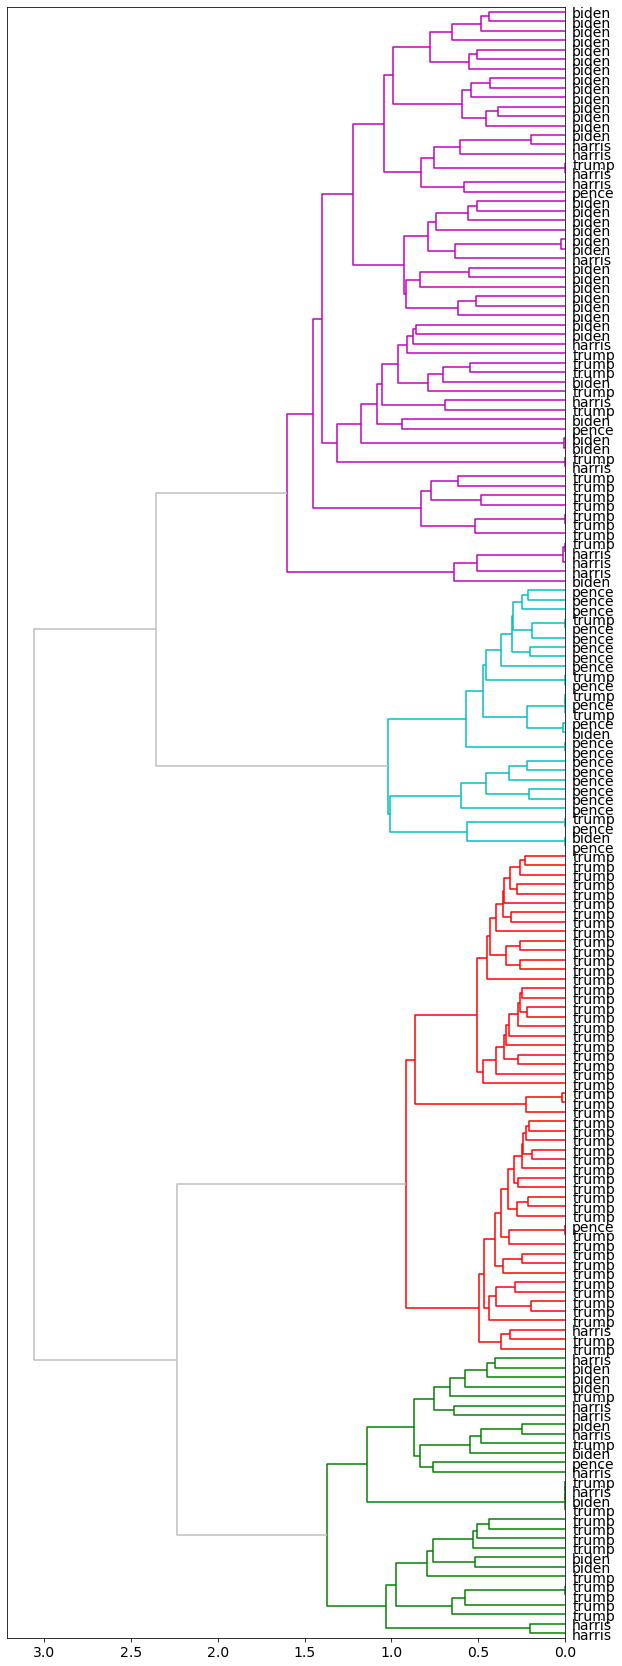

In [39]:
from scipy.spatial.distance import pdist
from matplotlib import pyplot as plt

all_sp = tfidf_df
L1 = all_sp.apply(lambda x: x / x.sum(), 1)

PAIRS = pd.DataFrame(index=pd.MultiIndex.from_product([bow.index.tolist(), bow.index.tolist()])).reset_index()
PAIRS = PAIRS[PAIRS.level_0 < PAIRS.level_1].set_index(['level_0','level_1'])
PAIRS.index.names = ['speech_a', 'speech_b']

PAIRS['cosine'] = pdist(L1, 'cosine')
PAIRS['cityblock'] = pdist(L1, 'cityblock')

hca(PAIRS['cosine'], color_thresh=2)
#hca(PAIRS['cityblock'], color_thresh=4.6)

### Group 0 (red): Trump rallies
1 speech labeled "harris", actually titled "Trump blasts Joe Biden, mocks Kamala Harris at.." bxuykoOlwjA
1 "pence" speech, but the first 1.5 hours are random crowd talking, followed by a short Pence speech

### Group 1 (purple): Formal, "presidential" speeches
33/61 speeches Biden
15 trump, 11 harris, 2 pence
Interestingly, these Trump speeches are not rallies, but major public appearances - SOTU, RNC, 4th of July, 60 minutes, etc.

### Group 2 (blue): Pence speeches (21/26)
1 "biden" actually Pence

### Group 3 (green): Casual talk
7 interviews, a couple press conferences, several miscategorized talk shows

In [52]:
tree = sch.linkage(PAIRS['cosine'], method='ward')
cuts = sch.cut_tree(tree, height=2)
bow['group'] = cuts
bow['date'] = pd.to_datetime(bow['date'])

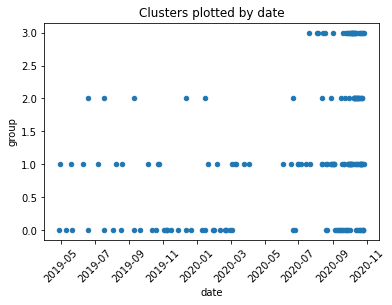

In [96]:
ax = bow.sort_values(['date']).reset_index().plot.scatter('date','group')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Clusters plotted by date')
plt.show()

In [92]:
bow[bow['group']==3][['speaker','date']].groupby('speaker').count()

,date
speaker,
biden,8
harris,8
pence,1
trump,13


In [98]:
bow[bow['group']==3].sort_values(['speaker'])[['speaker','date','title','transcript_type']].head(30)

,speaker,date,title,transcript_type
id,,,,
8fjmmw7TNPY,biden,2020-10-26 07:19:29+00:00,Talk Time 🔴 Watch Joe Biden’s Full Interview W...,interview
dx1PDSKMl6s,biden,2020-10-19 16:00:30+00:00,Noam Chomsky / Bad Faith Debate on Voting for ...,speech
I-8BtQg6F2A,biden,2020-10-17 16:16:42+00:00,War Room: Pandemic Ep 443 -The CCP's Ownership...,speech
0uvbOXfFEi8,biden,2020-10-13 03:05:59+00:00,Joe Biden's Body Language - Interview About Ta...,interview
8gvkshtY1kk,biden,2020-09-25 16:37:24+00:00,"""Benjamin Crump Interview, Joe Biden Interview...",interview
w1q10K8Cmic,biden,2020-09-30 02:57:05+00:00,"9-3-20 Biden Visits Kenosha, full livestream c...",speech
NKbhNPHxGdI,biden,2020-10-06 20:58:17+00:00,FULL VIDEO: Joe Biden delivers address on nati...,speech
4lGvJJKfekk,biden,2020-10-24 19:04:05+00:00,Reaction to Hunter Biden’s Business Partner Sp...,speech
tes38JVOLM0,harris,2020-10-21 01:47:37+00:00,"Kamala Harris gets REAL with CJ McCollum, Dono...",speech


## Principal Components Analysis

In [99]:
from sklearn.decomposition import PCA
from scipy.linalg import norm

# normalize vectors
tfidf_df = tfidf_df.apply(lambda x: x / norm(x), 1)
# center vectors
tfidf_df = tfidf_df - tfidf_df.mean()

pca = PCA(n_components=4)
pca.fit(tfidf_df)

# term loadings = eigenvectors * eigenvalues
loadings = pd.DataFrame(pca.components_).T * np.sqrt(pca.explained_variance_)

# doc-component matrix
dcm = pd.DataFrame(pca.transform(tfidf_df))
dcm.index = [tfidf_df.index[i][0] for i in dcm.index.values]

In [114]:
dcm.index.name = "id"
dcm['title'] = dcm.apply(lambda x: bow.loc[x.name].title, 1)
dcm['speaker'] = dcm.apply(lambda x: bow.loc[x.name].speaker, 1)
dcm['group'] = dcm.apply(lambda x: bow.loc[x.name].group, 1)
dcm['date'] = dcm.apply(lambda x: bow.loc[x.name].date, 1)

In [131]:
import plotly_express as px
fig = px.scatter(dcm, 0, 1, 
                    color='speaker', 
                    hover_name='title')
fig.show()

In [49]:
px.line(dcm[dcm['speaker']=='pence'].reset_index(), x='date', y=[0,1], hover_name='title')

NameError: name 'px' is not defined

In [118]:
loadings['trump_rally'] = (loadings[0]+loadings[1])*-1
loadings['pence'] = loadings[0]+(loadings[1]*-1)
loadings['interviews'] = loadings[1]+(loadings[0]*-1)
loadings['formal'] = loadings[0]+loadings[1]

# put term strings back as index
loadings.index = [tfidf_df.T.index[i] for i in loadings.index.values]
loadings.index.name = 'term'

In [127]:
loadings['trump_rally'].sort_values(ascending=False).head(10)

term
great     0.089000
said      0.086894
know      0.080922
want      0.061515
going     0.055990
right     0.053159
people    0.053129
say       0.045182
got       0.042612
never     0.037536
Name: trump_rally, dtype: float64

In [128]:
loadings['pence'].sort_values(ascending=False).head(10)

term
president    0.132200
trump        0.074095
donald       0.065693
america      0.063130
american     0.060440
years        0.059848
joe          0.043356
four         0.042074
every        0.040798
freedom      0.040311
Name: pence, dtype: float64

In [129]:
loadings[1].sort_values(ascending=False).head(10)

term
uh            0.047372
like          0.035231
um            0.034790
yeah          0.033515
atlanta       0.010821
act           0.010455
(applause)    0.009768
affordable    0.009714
kind          0.009638
oxygen        0.008461
Name: 1, dtype: float64

In [133]:
import plotly_express as px
fig = px.scatter(dcm, 0, 1, 
                    color='group', 
                    hover_name='title')
fig.show()

## Collocation - uses PMI (pointwise mutual information) to figure out 
## whether a bigram/trigram is better treated as a single "word"


In [191]:
# start with unigrams - just p(x)
pmi = counts_df.loc[:,[c for c in counts_df.columns.values if ' ' not in c]]
pmi = pmi.div(pmi.sum(axis=1), axis=0)


In [196]:
# bigrams - log(p(x,y) / (p(x)*p(y)))
pmi2 = counts_df.loc[:,[c for c in counts_df.columns.values if c.count(' ')==1 ]]
#pmi = pmi.div(pmi.sum(axis=1), axis=0)
def pxpy(xy_term):
    x, y = xy_term.name.split()
    #px = pmi[x] + 1e-60
    #py = pmi[y] + 1e-60
    return (pmi[x] + 1e-60) * (pmi[y] + 1e-60) # add a small value to avoid divide by zero

pmi2 = np.log2(pmi2.div(pmi2.apply(pxpy, axis=0), axis=0) + 1e-60)

In [199]:
pmi2.index.name = 'speech'
pmi2['videoId'] = bow.index.values
pmi2 = pmi2.set_index('videoId')
pmi2['_speaker'] = pmi2.apply(lambda x: bow.loc[x.name].speaker, 1)
pmi2 = pmi2.reset_index().set_index(['videoId','_speaker'])
pmi2s = pmi2.reset_index().drop(columns="videoId").groupby(['_speaker']).mean()
pmi2s = pmi2s.T.reset_index()
pmi2s.sort_values('biden', ascending=False).head(10)[['index']].values

array([['united states'],
       ['donald trump'],
       ['god bless'],
       ["we're going"],
       ['make sure'],
       ['every day'],
       ['states america'],
       ['american people'],
       ["i'm going"],
       ['joe biden']], dtype=object)

In [200]:
top10 = pd.DataFrame(pmi2s.sort_values('biden', ascending=False).head(10)[['index']].values)
top10.columns = ['biden']
top10['trump'] = pmi2s.sort_values('trump', ascending=False).head(10)[['index']].values
top10['harris'] = pmi2s.sort_values('harris', ascending=False).head(10)[['index']].values
top10['pence'] = pmi2s.sort_values('pence', ascending=False).head(10)[['index']].values
top10

,biden,trump,harris,pence
0,united states,united states,united states,donald trump
1,donald trump,thank much,donald trump,president donald
2,god bless,we're going,little bit,men women
3,we're going,years ago,joe biden,years ago
4,make sure,law enforcement,looks like,every day
5,every day,thank thank,they're going,american history
6,states america,long time,vice president,president trump
7,american people,white house,american people,united states
8,i'm going,great job,president united,law enforcement
9,joe biden,we're gonna,barack obama,four years


## Only bigrams

In [207]:
# create document-term count matrix
vectorizer = CountVectorizer(#max_features=5000, # only top 5k words
                             min_df=3,          # words must appear in this many speeches to count
                             max_df=0.9,        # words can't appear in more % of speeches than this.  
                             stop_words=stopwords.words('english'),
                             tokenizer=my_tokenizer,
                             ngram_range=(2,2)  # only bigrams
                            )
counts = vectorizer.fit_transform(bow['speech'])
counts_df = pd.DataFrame(counts.toarray())
counts_df.index.name = 'speech'
counts_df.columns = vectorizer.get_feature_names()

# convert counts into tfidf
transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(counts)
# make it a nice df
tfidf_df = pd.DataFrame(tfidf.toarray())
tfidf_df.index.name = 'speech'
tfidf_df.columns = vectorizer.get_feature_names()
tfidf_df['videoId'] = bow.index.values
tfidf_df = tfidf_df.set_index('videoId')

# group by speaker and aggregate
tfidf_df['_speaker'] = tfidf_df.apply(lambda x: bow.loc[x.name].speaker, 1)
tfidf_df = tfidf_df.reset_index().set_index(['videoId','_speaker'])
# collapse to speaker-only
tfidf_speaker = tfidf_df.reset_index().drop(columns="videoId").groupby(['_speaker']).mean()
# Normalize doc vector lengths
tfidf_speaker = tfidf_speaker.apply(lambda x: x / norm(x), 1)
# transpose for easier filtering
tfidf_speaker = tfidf_speaker.T.reset_index()

# convert df to a handy top-10 comparison matrix
top10 = pd.DataFrame(tfidf_speaker.sort_values('biden', ascending=False).head(10)[['index']].values)
top10.columns = ['biden']
top10['trump'] = tfidf_speaker.sort_values('trump', ascending=False).head(10)[['index']].values
top10['harris'] = tfidf_speaker.sort_values('harris', ascending=False).head(10)[['index']].values
top10['pence'] = tfidf_speaker.sort_values('pence', ascending=False).head(10)[['index']].values
top10

,biden,trump,harris,pence
0,donald trump,we're going,senator graham,president donald
1,joe biden,thank much,affordable care,donald trump
2,we're going,united states,south carolina,four years
3,united states,we're gonna,care act,joe biden
4,make sure,great job,criminal justice,president trump
5,middle class,make america,like know,men women
6,i'm going,joe biden,trump party,trump white
7,child care,new york,health care,years president
8,states america,north carolina,donald trump,years means
9,may god,billion dollars,president trump,united states


In [72]:
# key phrases - a score for which terms each speaker uses that the others don't.
tfidf_speaker['biden2'] = tfidf_speaker.biden - (tfidf_speaker.harris + tfidf_speaker.pence + tfidf_speaker.trump)
tfidf_speaker['trump2'] = tfidf_speaker.trump - (tfidf_speaker.harris + tfidf_speaker.pence + tfidf_speaker.biden)
tfidf_speaker['harris2'] = tfidf_speaker.harris - (tfidf_speaker.trump + tfidf_speaker.pence + tfidf_speaker.biden)
tfidf_speaker['pence2'] = tfidf_speaker.pence - (tfidf_speaker.harris + tfidf_speaker.trump + tfidf_speaker.biden)

top10 = pd.DataFrame(tfidf_speaker.sort_values('biden2', ascending=False).head(10)[['index']].values)
top10.columns = ['biden']
top10['trump'] = tfidf_speaker.sort_values('trump2', ascending=False).head(10)[['index']].values
top10['harris'] = tfidf_speaker.sort_values('harris2', ascending=False).head(10)[['index']].values
top10['pence'] = tfidf_speaker.sort_values('pence2', ascending=False).head(10)[['index']].values
top10

,biden,trump,harris,pence
0,middle class,great job,senator graham,president donald
1,child care,fake news,affordable care,trump white
2,battle soul,thank much,south carolina,years means
3,"mr president,",sleepy joe,trump party,four years
4,across world,great people,care act,stand president
5,back better,going win,criminal justice,years president
6,god protect,history country,make case,president stands
7,protect troops,make america,million years,need four
8,clean energy,sanctuary cities,bring us,red tape
9,community college,air force,death penalty,promises made


## Only trigrams

In [208]:
# create document-term count matrix
vectorizer = CountVectorizer(#max_features=5000, # only top 5k words
                             min_df=3,          # words must appear in this many speeches to count
                             max_df=0.9,        # words can't appear in more % of speeches than this.  
                             stop_words=stopwords.words('english'),
                             tokenizer=my_tokenizer,
                             ngram_range=(3,3)  # only bigrams
                            )
counts = vectorizer.fit_transform(bow['speech'])
counts_df = pd.DataFrame(counts.toarray())
counts_df.index.name = 'speech'
counts_df.columns = vectorizer.get_feature_names()

# convert counts into tfidf
transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(counts)
# make it a nice df
tfidf_df = pd.DataFrame(tfidf.toarray())
tfidf_df.index.name = 'speech'
tfidf_df.columns = vectorizer.get_feature_names()
tfidf_df['videoId'] = bow.index.values
tfidf_df = tfidf_df.set_index('videoId')

# group by speaker and aggregate
tfidf_df['_speaker'] = tfidf_df.apply(lambda x: bow.loc[x.name].speaker, 1)
tfidf_df = tfidf_df.reset_index().set_index(['videoId','_speaker'])
# collapse to speaker-only
tfidf_speaker = tfidf_df.reset_index().drop(columns="videoId").groupby(['_speaker']).mean()
# Normalize doc vector lengths
tfidf_speaker = tfidf_speaker.apply(lambda x: x / norm(x), 1)
# transpose for easier filtering
tfidf_speaker = tfidf_speaker.T.reset_index()

# convert df to a handy top-10 comparison matrix
top10 = pd.DataFrame(tfidf_speaker.sort_values('biden', ascending=False).head(10)[['index']].values)
top10.columns = ['biden']
top10['trump'] = tfidf_speaker.sort_values('trump', ascending=False).head(10)[['index']].values
top10['harris'] = tfidf_speaker.sort_values('harris', ascending=False).head(10)[['index']].values
top10['pence'] = tfidf_speaker.sort_values('pence', ascending=False).head(10)[['index']].values
top10

,biden,trump,harris,pence
0,united states america,thank much thank,affordable care act,president donald trump
1,battle soul nation,make america great,black lives matter,years president donald
2,build back better,new york times,criminal justice reform,four years president
3,may god protect,late term abortion,people south carolina,donald trump white
4,god protect troops,done great job,know i'm saying,four years means
5,bless may god,we're going win,united states senate,trump white house
6,god bless may,thank thank much,bring us together,first three years
7,thank thank thank,thank thank thank,president trump party,president donald trump.
8,beat donald trump,black lives matter,like know like,need four years
9,president united states,president united states,president united states,stand president donald


In [211]:
tfidf_speaker

_speaker,index,biden,harris,pence,trump
0,000 african americans,0.000000,0.000000,0.000000,0.007060
1,000 criminals onto,0.000000,0.000000,0.000000,0.006645
2,000 gang members,0.000000,0.000000,0.000000,0.009829
3,000 jobs right,0.000000,0.000000,0.008774,0.001312
4,000 manufacturing jobs,0.019316,0.000000,0.012691,0.004076
...,...,...,...,...,...
14413,zoe shout dress,0.001409,0.002864,0.000000,0.001342
14414,zones demanded american,0.000000,0.000000,0.000000,0.005932
14415,zones jobs investment,0.000000,0.000000,0.000000,0.005930
14416,zoom right right,0.001409,0.002864,0.000000,0.001342


In [70]:
# key phrases - a score for which terms each speaker uses that the others don't.
tfidf_speaker['biden2'] = tfidf_speaker.biden - (tfidf_speaker.harris + tfidf_speaker.pence + tfidf_speaker.trump)
tfidf_speaker['trump2'] = tfidf_speaker.trump - (tfidf_speaker.harris + tfidf_speaker.pence + tfidf_speaker.biden)
tfidf_speaker['harris2'] = tfidf_speaker.harris - (tfidf_speaker.trump + tfidf_speaker.pence + tfidf_speaker.biden)
tfidf_speaker['pence2'] = tfidf_speaker.pence - (tfidf_speaker.harris + tfidf_speaker.trump + tfidf_speaker.biden)

top10 = pd.DataFrame(tfidf_speaker.sort_values('biden2', ascending=False).head(10)[['index']].values)
top10.columns = ['biden']
top10['trump'] = tfidf_speaker.sort_values('trump2', ascending=False).head(10)[['index']].values
top10['harris'] = tfidf_speaker.sort_values('harris2', ascending=False).head(10)[['index']].values
top10['pence'] = tfidf_speaker.sort_values('pence2', ascending=False).head(10)[['index']].values
top10

,biden,trump,harris,pence
0,build back better,late term abortion,affordable care act,president donald trump
1,god protect troops,we're going win,people south carolina,years president donald
2,may god protect,thank much thank,criminal justice reform,donald trump white
3,bless may god,done great job,bring us together,trump white house
4,god bless may,thank thank much,know i'm saying,four years means
5,battle soul nation,billions billions dollars,like know like,four years president
6,beat donald trump,sleepy joe biden,president trump party,stand president donald
7,hope history rhyme,make america great,equal justice law.,need four years
8,mr. vice president,air force one,black lives matter,trump president stands
9,there's single thing,short period time,criminal justice system,i'm proud report


,,"$10,000",(applause),000,1,1%,1.5,1.6,1.8,10,10%,...,younger,youngest,youth,youtube,zero,zip,zone,zones,zoom,♪
videoId,_speaker,,,,,,,,,,,,,,,,,,,,,
oWlLZZ8pcp8,trump,-0.00073,-0.008067,-0.014676,-0.003320,-0.000954,-0.002385,-0.001091,0.009060,-0.004646,-0.000831,...,-0.001721,-0.00104,0.009207,-0.002285,0.010127,-0.001776,-0.000836,0.005525,-0.000696,-0.002046
Z6N1WdJgnLo,biden,-0.00073,-0.008067,-0.014676,-0.003320,-0.000954,-0.002385,-0.001091,-0.001433,-0.009524,-0.000831,...,-0.001721,-0.00104,-0.001457,-0.002285,-0.004497,-0.001776,-0.000836,-0.002920,-0.000696,-0.002046
WIwGrZKdsY0,trump,-0.00073,-0.008067,-0.014676,0.004306,0.010539,-0.002385,-0.001091,-0.001433,0.007529,-0.000831,...,-0.001721,-0.00104,-0.001457,-0.002285,-0.004497,-0.001776,-0.000836,-0.002920,-0.000696,-0.002046
u-AEAq7jzcU,biden,-0.00073,-0.008067,-0.014676,-0.003320,-0.000954,-0.002385,-0.001091,-0.001433,0.000977,-0.000831,...,-0.001721,-0.00104,-0.001457,-0.002285,-0.004497,-0.001776,-0.000836,-0.002920,-0.000696,-0.002046
GgINUxecNrg,trump,-0.00073,-0.008067,-0.014676,0.017218,0.014522,-0.002385,-0.001091,-0.001433,-0.009524,0.015630,...,-0.001721,-0.00104,-0.001457,-0.002285,-0.004497,-0.001776,-0.000836,-0.002920,-0.000696,-0.002046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4lGvJJKfekk,biden,-0.00073,-0.008067,-0.014676,-0.003320,-0.000954,-0.002385,-0.001091,-0.001433,0.014416,-0.000831,...,-0.001721,-0.00104,-0.001457,-0.002285,0.019424,-0.001776,-0.000836,-0.002920,-0.000696,-0.002046
RzKt6YTnbuk,trump,-0.00073,-0.008067,0.007487,-0.003320,-0.000954,-0.002385,-0.001091,-0.001433,0.030661,-0.000831,...,-0.001721,-0.00104,-0.001457,0.005835,-0.004497,-0.001776,-0.000836,-0.002920,-0.000696,-0.002046
KrI1V281Wl4,pence,-0.00073,-0.008067,0.007487,-0.003320,-0.000954,-0.002385,-0.001091,-0.001433,0.030661,-0.000831,...,-0.001721,-0.00104,-0.001457,0.005835,-0.004497,-0.001776,-0.000836,-0.002920,-0.000696,-0.002046


In [140]:
tfidf_df = tfidf_df.reset_index().set_index('videoId')
tfidf_df['vdate'] = tfidf_df.apply(lambda x: bow.loc[x.name].date, 1)

In [141]:
tfidf_df

,_speaker,"$10,000",(applause),000,1,1%,1.5,1.6,1.8,10,...,youngest,youth,youtube,zero,zip,zone,zones,zoom,♪,vdate
videoId,,,,,,,,,,,,,,,,,,,,,
oWlLZZ8pcp8,trump,-0.00073,-0.008067,-0.014676,-0.003320,-0.000954,-0.002385,-0.001091,0.009060,-0.004646,...,-0.00104,0.009207,-0.002285,0.010127,-0.001776,-0.000836,0.005525,-0.000696,-0.002046,2019-04-28 02:07:41+00:00
Z6N1WdJgnLo,biden,-0.00073,-0.008067,-0.014676,-0.003320,-0.000954,-0.002385,-0.001091,-0.001433,-0.009524,...,-0.00104,-0.001457,-0.002285,-0.004497,-0.001776,-0.000836,-0.002920,-0.000696,-0.002046,2019-04-29 21:04:46+00:00
WIwGrZKdsY0,trump,-0.00073,-0.008067,-0.014676,0.004306,0.010539,-0.002385,-0.001091,-0.001433,0.007529,...,-0.00104,-0.001457,-0.002285,-0.004497,-0.001776,-0.000836,-0.002920,-0.000696,-0.002046,2019-05-09 03:55:17+00:00
u-AEAq7jzcU,biden,-0.00073,-0.008067,-0.014676,-0.003320,-0.000954,-0.002385,-0.001091,-0.001433,0.000977,...,-0.00104,-0.001457,-0.002285,-0.004497,-0.001776,-0.000836,-0.002920,-0.000696,-0.002046,2019-05-18 19:53:18+00:00
GgINUxecNrg,trump,-0.00073,-0.008067,-0.014676,0.017218,0.014522,-0.002385,-0.001091,-0.001433,-0.009524,...,-0.00104,-0.001457,-0.002285,-0.004497,-0.001776,-0.000836,-0.002920,-0.000696,-0.002046,2019-05-21 00:39:36+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4lGvJJKfekk,biden,-0.00073,-0.008067,-0.014676,-0.003320,-0.000954,-0.002385,-0.001091,-0.001433,0.014416,...,-0.00104,-0.001457,-0.002285,0.019424,-0.001776,-0.000836,-0.002920,-0.000696,-0.002046,2020-10-24 19:04:05+00:00
RzKt6YTnbuk,trump,-0.00073,-0.008067,0.007487,-0.003320,-0.000954,-0.002385,-0.001091,-0.001433,0.030661,...,-0.00104,-0.001457,0.005835,-0.004497,-0.001776,-0.000836,-0.002920,-0.000696,-0.002046,2020-10-25 04:40:11+00:00
KrI1V281Wl4,pence,-0.00073,-0.008067,0.007487,-0.003320,-0.000954,-0.002385,-0.001091,-0.001433,0.030661,...,-0.00104,-0.001457,0.005835,-0.004497,-0.001776,-0.000836,-0.002920,-0.000696,-0.002046,2020-10-25 10:24:34+00:00


In [142]:
px.scatter(tfidf_df, "vdate","know", color="_speaker")